In [1]:
import os
os.chdir('../')

In [2]:
from redunet import ReduNetVector
import utils_example as ue

# Packages

To install the required packages, run 
```
conda create --name redunet --file requirements.txt
```

## Hyperparameters

We first set the hyperparameters for our data:
- `data_dim`: dimension of the data
- `dataset`: choice of dataset (any option 1-8)
- `train_noise`: scale of gaussian noise added to training data
- `test_noise`: scale of gaussian noise added to testing data
- `train_samples`: number of training samples
- `test_samples`: number of testing samples

In [3]:
data_dim = 2
dataset = 1  # can be 1 to 8
train_noise = 0.2
test_noise = 0.1
train_samples = 100
test_samples = 100

Then for ReduNet:
- `num_layers`: number of layers
- `eta`: step size $\eta$
- `eps`: distortion $\epsilon^2$

In [4]:
num_layers = 200
eta = 0.5
eps = 0.1

## Data

Using `generate_2d(.)` function, we sample training and testing data from a Gaussian distribution. We also preprocess the data by normalizing them with $\ell^2$ norm. 

Our input has dimensions:

-`X_train`: shape: `(train_samples, data_dim)` <br>
-`y_train`: shape: `(train_samples,)`

In [5]:
X_train, y_train, num_classes = ue.generate_2d(dataset, train_noise, train_samples) # train
X_test, y_test, num_classes = ue.generate_2d(dataset, test_noise, test_samples) # test

In [6]:
X_train[:5], y_train[:5]

(tensor([[ 0.9866,  0.1632],
         [ 1.0000, -0.0097],
         [ 0.9970, -0.0775],
         [ 0.8757, -0.4828],
         [ 0.9955, -0.0951]]),
 tensor([0, 0, 0, 0, 0]))

## Model

We then initialize our network by running `init` method, which takes in training data `X_train` and labels `y_train`. It also outputs the representations `Z_train`. While constructing, our network also computes the `total_loss`, `discrimn_loss` and `compress_loss`. Please refer to our paper for its formulation. 

In [7]:
net = ReduNetVector(num_classes, data_dim, num_layers=num_layers, eta=eta, eps=eps)
Z_train = net.init(X_train, y_train)

### Training

Finally, we plot our loss, inputs and outputs for visualization. 

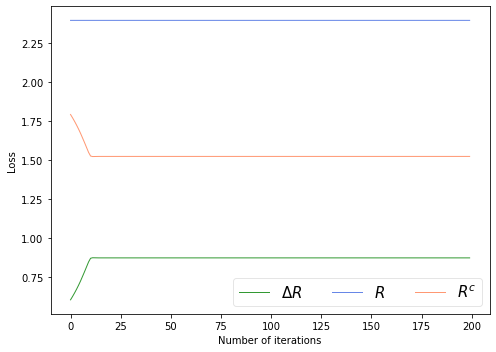

In [8]:
ue.plot_loss_mcr(net.get_loss())

Visualing our training data and representations

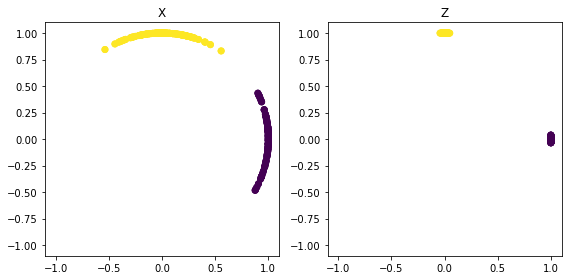

In [9]:
ue.plot_2d(X_train, y_train, Z_train) 

### Testing

Now that the network is constructed and trained, we can compute representations of our test data. 

In [10]:
Z_test = net(X_test).detach()

And visualize its loss and outputs.

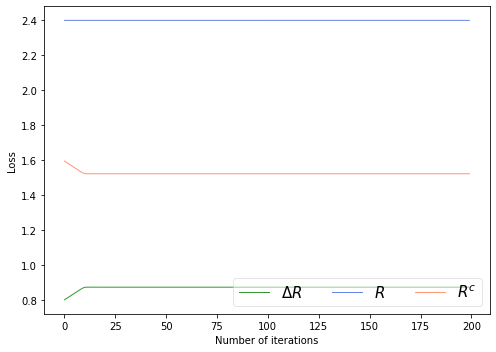

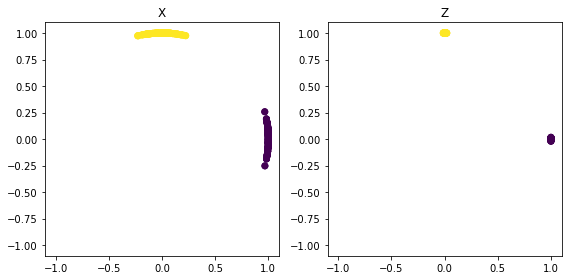

In [11]:
ue.plot_loss_mcr(net.get_loss())
ue.plot_2d(X_test, y_test, Z_test)